In [68]:
import numpy as np
from PIL import Image
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt

from mdctn import mdct, imdct

# %matplotlib inline
pylab.rcParams['figure.figsize'] = (8, 8)

from pathlib import Path

image = 'wood-1024'
experiment = 'quant_mdct'

output = Path('outputs') / image

output.mkdir(exist_ok=True, parents=True)

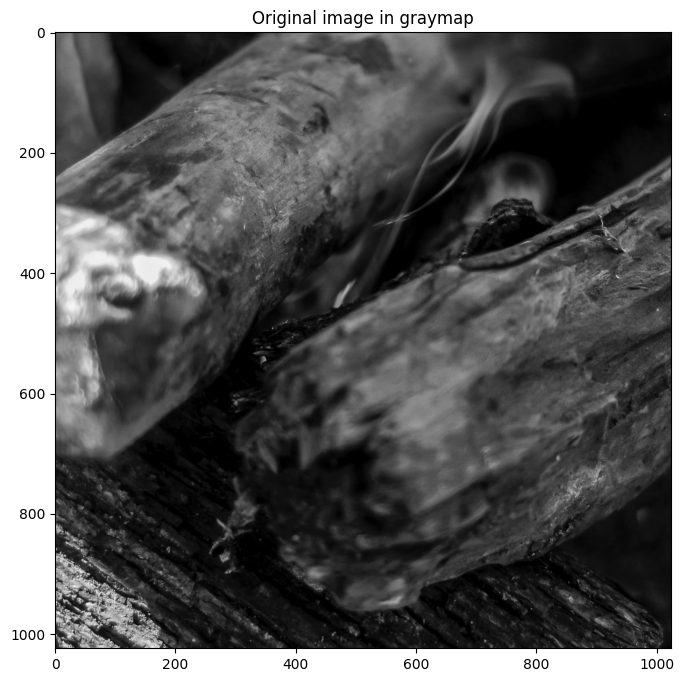

In [69]:
# y, cb, cr = Image.open(f'../../images/{image}.png').convert('YCbCr').split()
y, cb, cr = Image.open(f'../../images/wood/wood-1024.png').convert('YCbCr').split()
im = np.array(y)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

im = im.astype(np.int64)

plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original image in graymap")

plt.imsave(f'{output}/original.png', im, cmap='gray')

Text(0.5, 1.0, 'Kaiser-Bessel derived window')

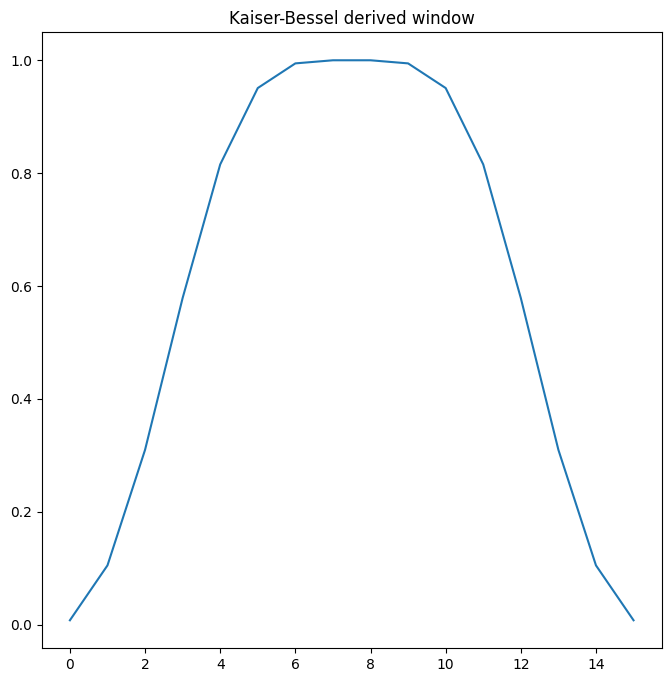

In [70]:
dct = np.zeros_like(im, dtype=np.float64)

# im -= 128

from scipy.signal.windows import kaiser_bessel_derived as kbd

N=16

dct_type = 4
dct_norm = 'ortho'
wfltr = kbd(N, np.pi * 3.4) # upto 709

plt.figure()
plt.plot(wfltr)
plt.title("Kaiser-Bessel derived window")

In [71]:
for i in range(im.shape[0]):
    dct[i] = mdct(im[i], N, wfltr, type=dct_type, norm=dct_norm, orthogonalize=True)

for i in range(dct.shape[1]):
    dct[:, i] = mdct(dct[:, i], N, wfltr, type=dct_type, norm=dct_norm, orthogonalize=True)

In [72]:
quant_table_p = [
  16,  11,  10,  16,  24,  40,  51,  61,
  12,  12,  14,  19,  26,  58,  60,  55,
  14,  13,  16,  24,  40,  57,  69,  56,
  14,  17,  22,  29,  51,  87,  80,  62,
  18,  22,  37,  56,  68, 109, 103,  77,
  24,  35,  55,  64,  81, 104, 113,  92,
  49,  64,  78,  87, 103, 121, 120, 101,
  72,  92,  95,  98, 112, 100, 103,  99,
]

quant_table_0 = [
   2,   2,   2,  16,  24,  40,  51,  61,
   2,   2,  14,  19,  26,  58,  60,  55,
   2,  13,  16,  24,  40,  57,  69,  56,
  14,  17,  22,  29,  51,  87,  80,  62,
  18,  22,  37,  56,  68, 109, 103,  77,
  24,  35,  55,  64,  81, 104, 113,  92,
  49,  64,  78,  87, 103, 121, 120, 101,
  72,  92,  95,  98, 112, 100, 103,  99,
]

quant_table_1 = [
    1, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
]

quant_table_2 = [
    1,     1, 10000, 10000, 10000, 10000, 10000, 10000,
    1, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
]

quant_table_3 = [
    1,     1,     1, 10000, 10000, 10000, 10000, 10000,
    1,     1, 10000, 10000, 10000, 10000, 10000, 10000,
    1, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
]

quant_table_4 = [
    1,     1,     1,     1, 10000, 10000, 10000, 10000,
    1,     1,     1, 10000, 10000, 10000, 10000, 10000,
    1,     1, 10000, 10000, 10000, 10000, 10000, 10000,
    1, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
]

quant_table_5 = [
    1,     1,     1,     1,     1, 10000, 10000, 10000,
    1,     1,     1,     1, 10000, 10000, 10000, 10000,
    1,     1,     1, 10000, 10000, 10000, 10000, 10000,
    1,     1, 10000, 10000, 10000, 10000, 10000, 10000,
    1, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
]

quant_table_6 = [
    1,     1,     1,     1,     1,     1, 10000, 10000,
    1,     1,     1,     1,     1, 10000, 10000, 10000,
    1,     1,     1,     1, 10000, 10000, 10000, 10000,
    1,     1,     1, 10000, 10000, 10000, 10000, 10000,
    1,     1, 10000, 10000, 10000, 10000, 10000, 10000,
    1, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
]

quant_table_7 = [
    1,     1,     1,     1,     1,     1,     1, 10000,
    1,     1,     1,     1,     1,     1, 10000, 10000,
    1,     1,     1,     1,     1, 10000, 10000, 10000,
    1,     1,     1,     1, 10000, 10000, 10000, 10000,
    1,     1,     1, 10000, 10000, 10000, 10000, 10000,
    1,     1, 10000, 10000, 10000, 10000, 10000, 10000,
    1, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
]

quant_table_8 = [
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1, 10000,
    1,     1,     1,     1,     1,     1, 10000, 10000,
    1,     1,     1,     1,     1, 10000, 10000, 10000,
    1,     1,     1,     1, 10000, 10000, 10000, 10000,
    1,     1,     1, 10000, 10000, 10000, 10000, 10000,
    1,     1, 10000, 10000, 10000, 10000, 10000, 10000,
    1, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
]

quant_table_9 = [
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1, 10000,
    1,     1,     1,     1,     1,     1, 10000, 10000,
    1,     1,     1,     1,     1, 10000, 10000, 10000,
    1,     1,     1,     1, 10000, 10000, 10000, 10000,
    1,     1,     1, 10000, 10000, 10000, 10000, 10000,
    1,     1, 10000, 10000, 10000, 10000, 10000, 10000,
]

quant_table_10 = [
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1, 10000,
    1,     1,     1,     1,     1,     1, 10000, 10000,
    1,     1,     1,     1,     1, 10000, 10000, 10000,
    1,     1,     1,     1, 10000, 10000, 10000, 10000,
    1,     1,     1, 10000, 10000, 10000, 10000, 10000,
]

quant_table_11 = [
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1, 10000,
    1,     1,     1,     1,     1,     1, 10000, 10000,
    1,     1,     1,     1,     1, 10000, 10000, 10000,
    1,     1,     1,     1, 10000, 10000, 10000, 10000,
]

quant_table_12 = [
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1, 10000,
    1,     1,     1,     1,     1,     1, 10000, 10000,
    1,     1,     1,     1,     1, 10000, 10000, 10000,
]

quant_table_13 = [
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1, 10000,
    1,     1,     1,     1,     1,     1, 10000, 10000,
]

quant_table_14 = [
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1, 10000,
]

quant_table_15 = [
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
    1,     1,     1,     1,     1,     1,     1,     1,
]

quant_table = quant_table_4



In [73]:
for i in np.r_[:dct.shape[0]:8]:
    for j in np.r_[:dct.shape[1]:8]:
        dct[i:(i+8), j:(j+8)] = (np.rint(dct[i:(i+8), j:(j+8)].ravel() / quant_table) * quant_table).reshape((8, 8))

In [74]:
im_rec = np.zeros_like(im)

for i in range(dct.shape[1]):
    dct[:, i] = imdct(dct[:, i], N, wfltr, type=dct_type, norm=dct_norm, orthogonalize=True)

for i in range(im.shape[0]):
    im_rec[i] = imdct(dct[i], N, wfltr, type=dct_type, norm=dct_norm, orthogonalize=True)

# im_rec += 128

Text(0.5, 1.0, 'Recovered image')

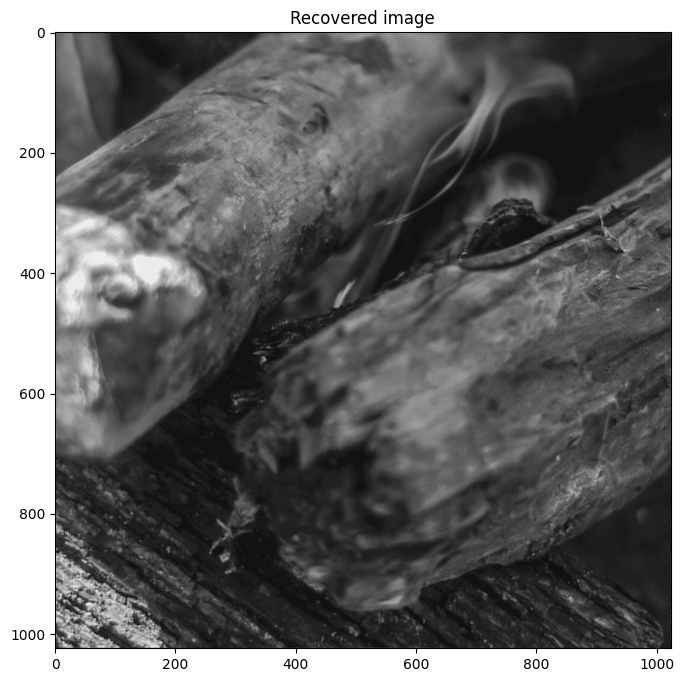

In [75]:
plt.figure()
plt.imshow(im_rec, cmap='gray')
plt.title("Recovered image")

In [76]:
plt.imsave(f'{output}/mdct_orig_comparision.png', np.hstack((im, im_rec)), cmap='gray')

In [77]:
plt.imsave(f'{output}/mdct_rec.png', im_rec, cmap='gray')

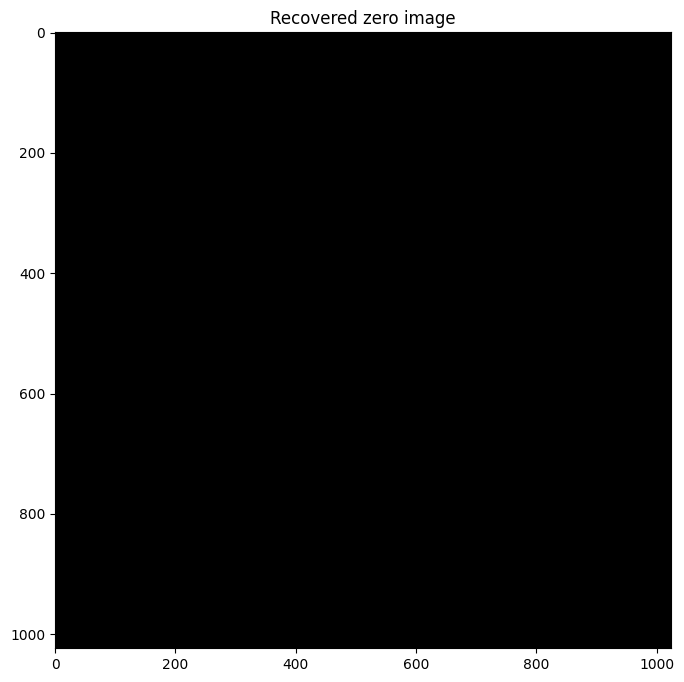

In [78]:
# imz = np.zeros_like(im) - 128
imz = np.zeros_like(im)

dctz = np.zeros_like(im, dtype=np.float64)

for i in range(imz.shape[0]):
    dctz[i] = mdct(imz[i], N, wfltr, type=dct_type, norm=dct_norm)

for i in range(dct.shape[1]):
    dctz[:, i] = mdct(dctz[:, i], N, wfltr, type=dct_type, norm=dct_norm)

for i in np.r_[:dct.shape[0]:8]:
    for j in np.r_[:dct.shape[1]:8]:
        dctz[i:(i+8), j:(j+8)] = (np.rint(dctz[i:(i+8), j:(j+8)].ravel() / quant_table) * quant_table).reshape((8, 8))

imz_rec = np.zeros_like(imz)

for i in range(dctz.shape[1]):
    dctz[:, i] = imdct(dctz[:, i], N, wfltr, type=dct_type, norm=dct_norm)

for i in range(imz.shape[0]):
    imz_rec[i] = imdct(dctz[i], N, wfltr, type=dct_type, norm=dct_norm)

# imz_rec += 128


plt.figure()
plt.imshow(imz_rec, cmap='gray')
plt.title("Recovered zero image")

plt.imsave(f'{output}/zero_rec.png', imz_rec, cmap='gray')

Text(0.5, 1.0, 'Error subtracted recovered image')

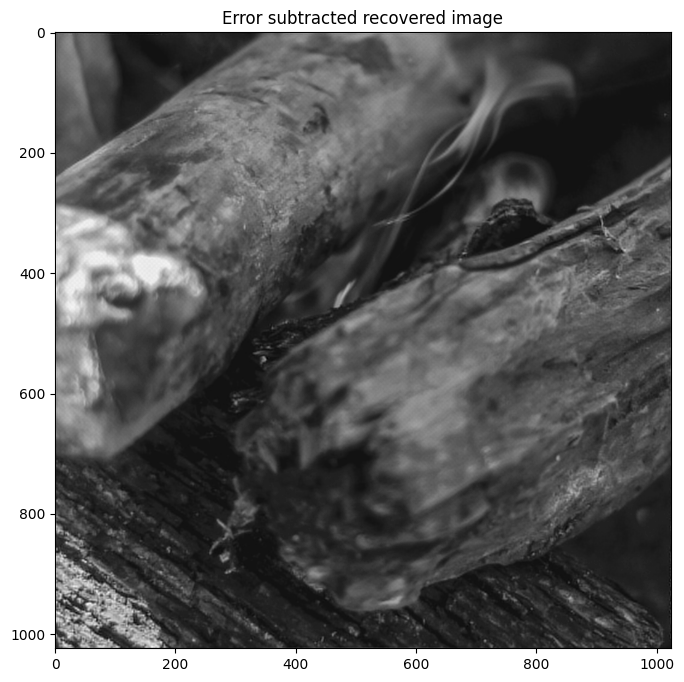

In [79]:
imc_rec = im_rec - imz_rec

plt.figure()
plt.imshow(imc_rec, cmap='gray')
plt.title("Error subtracted recovered image")

In [80]:
plt.imsave(f'{output}/corr_mdct_rec.png', im_rec, cmap='gray')